# Simple Linear Regression

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 - Read the Dataset

In [1]:
import pandas as pd
df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### I want to understand relationship between RND and PROFIT
PROFIT ~ RND , 
Profit_pred = B0 +B1*RND , 
X = RND, Y = PROFIT

In [2]:
X = df[["RND"]]
Y = df[["PROFIT"]]

In [3]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [4]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


<Axes: xlabel='RND', ylabel='PROFIT'>

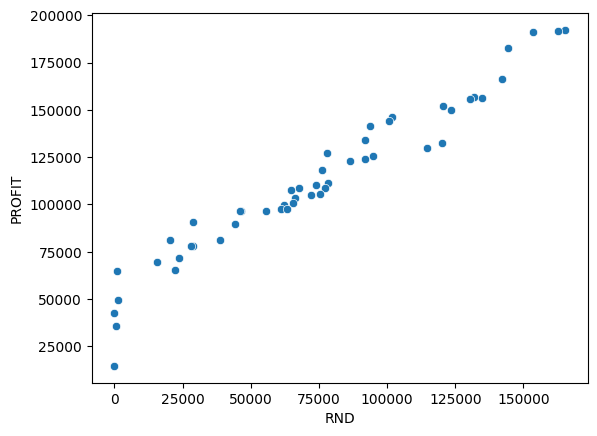

In [6]:
import seaborn as sns
sns.scatterplot(data=df, x="RND", y="PROFIT")

### Step 3 -Perform Model Building

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

### Get Slope and Intercept

In [9]:
model.intercept_

array([49032.89914125])

In [10]:
model.coef_

array([[0.85429137]])

### Profit_pred = 49032.9 + 0.8542*RND

# Regression Plot

<Axes: xlabel='RND', ylabel='PROFIT'>

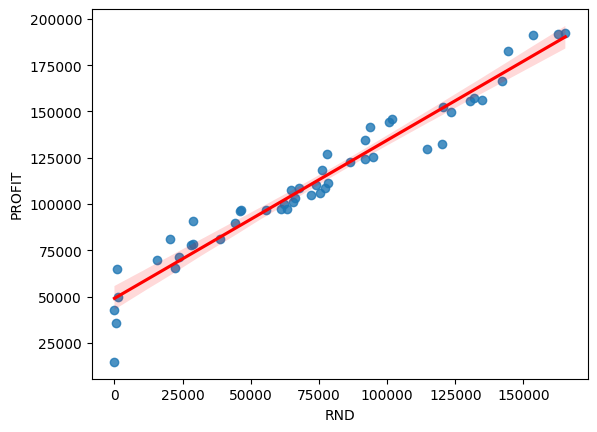

In [14]:
sns.regplot(data=df, x="RND", y="PROFIT", line_kws={"color":"red"})

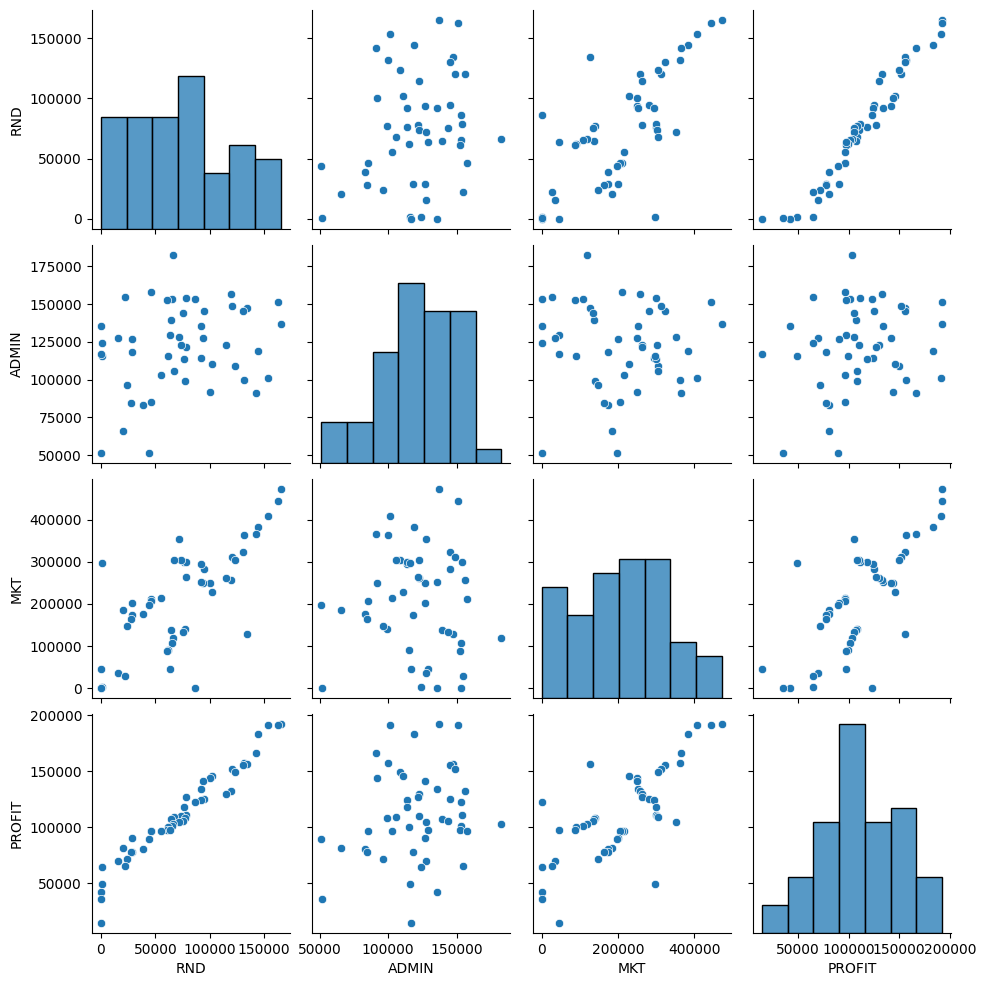

In [15]:
sns.pairplot(data=df)

In [17]:
ypred = model.predict(X)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [18]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


# Model Evalution
1. Root Mean Squared Error (Std error)
2. Mean Absolute Error
3. Mean Absolute Percentage error
4. R2 Score


In [19]:
from sklearn.metrics import(
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

In [20]:
def evaluate_model(model, x, y):
    # Predict the results for x
    ypred = model.predict(x)
    # Evaluate the metrics
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y,ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    # Print the metrics
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE :{mae:.2f}")
    print(f"MAPE :{mape:.4f}")
    print(f"R2 :{r2:.4f}")

In [21]:
evaluate_model(model, X, Y)

RMSE : 9226.10
MAE :6910.98
MAPE :0.1107
R2 :0.9465


### From above r2 score is 0.9465 > 0.8 hence it is a good model and can be used for out of prediction 

### Out of sample prediction

In [22]:
X.values[0:5]

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34]])

In [23]:
rnd = [[1_55_000]]
model.predict(rnd)

c:\Machine-Learning\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[181448.06163677]])

### Profit_pred = 49032.9 + 0.8543*RND

In [24]:
49032.9 + 0.8543*155000

181449.4

### If RND increases by 1 unit Profit will increase by 0.8543
### If RND increases by 1000 , Profit will increase by 854.3